In [405]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
import time

from IPython.display import display

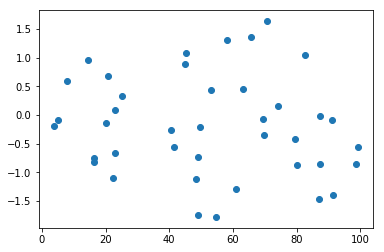

In [289]:
n=40
x = np.sort(np.random.uniform(0,100,n)).reshape(-1,1)
y = np.random.normal(0,0.5,(n,1)) + np.sin(x) # + np.exp(x/50)
random_indices = np.random.permutation(range(40))
x_obs = []
y_obs = []

#print(np.column_stack((x,y)))
kernel = GPy.kern.RBF(1,1,1)

plt.scatter(x,y)
plt.show()

In [227]:
m = GPy.models.GPRegression(x,y,kernel)
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


Optimization restart 1/10, f = 48.81808545969134
Optimization restart 2/10, f = 48.81808545969124
Optimization restart 3/10, f = 48.81808545979824
Optimization restart 4/10, f = 48.81808545983326
Optimization restart 5/10, f = 48.81808545969221
Optimization restart 6/10, f = 48.818085459812764
Optimization restart 7/10, f = 48.81808545969191
Optimization restart 8/10, f = 48.81808545969355
Optimization restart 9/10, f = 48.81808545969122
Optimization restart 10/10, f = 48.81808545969152


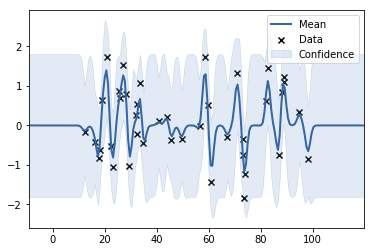

In [262]:
m.optimize_restarts(10)

fig,ax=plt.subplots(1)

m.plot(ax=ax)
plt.show()

 /Users/nico/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning:Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=82.59251035598982, right=82.59251035598982


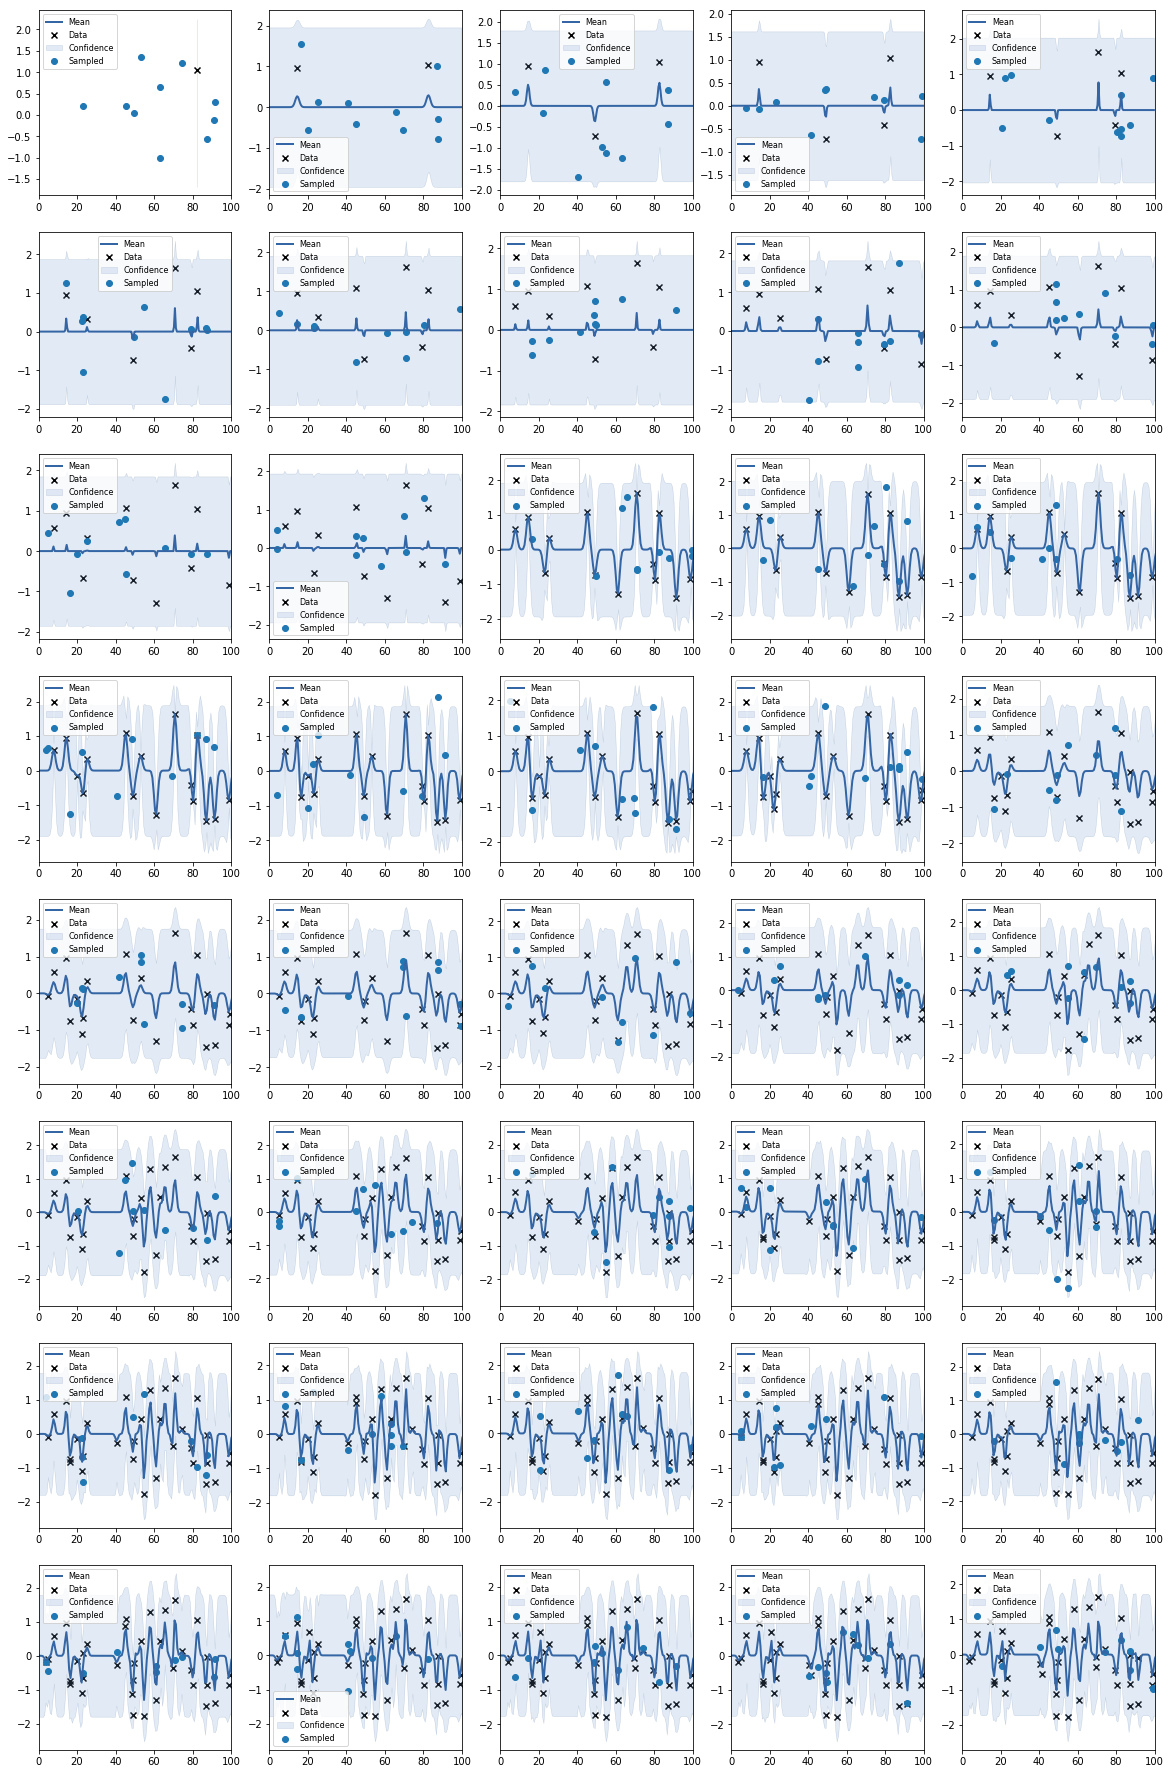

In [406]:
x_obs = np.array([])
y_obs = np.array([])

training_times = []

fig,axes = plt.subplots(8,5,figsize=(20,32))

for i in range(40):
    x_obs = np.append(x_obs,x[random_indices[i]]).reshape(-1,1)
    y_obs = np.append(y_obs,y[random_indices[i]]).reshape(-1,1)
    
    start = time.time()
    m = GPy.models.GPRegression(x_obs,y_obs,kernel)
    m.optimize_restarts(10,verbose=0)
    mplot = m.plot(ax=axes.ravel()[i])
    
    training_times.append(time.time() - start)
    
    sampled_x = []
    sampled_y = []
    
    for _ in range(10):
        sampled_x.append(np.random.choice(x[:,0]))
        sampled_y.append(np.sum(m.posterior_samples_f(np.array([[4]]),size=1)))
    
    axes.ravel()[i].scatter(sampled_x,sampled_y,label='Sampled')
    axes.ravel()[i].legend(fontsize=8)
    axes.ravel()[i].set_xlim(0,100)
    
    GPy.plotting.show(mplot, filename='basic_gp_regression_notebook')



plt.show()

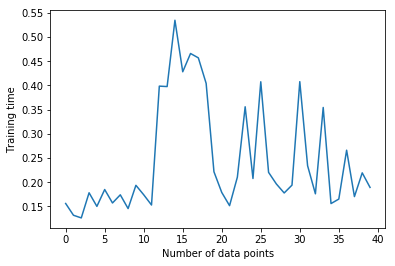

In [408]:
plt.plot(range(0,40),training_times)
plt.xlabel('Number of data points')
plt.ylabel('Training time')
plt.show()